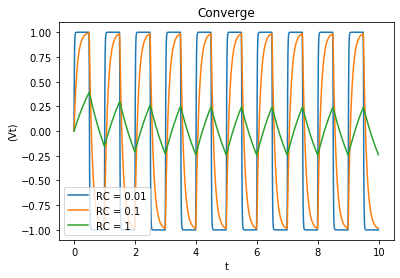

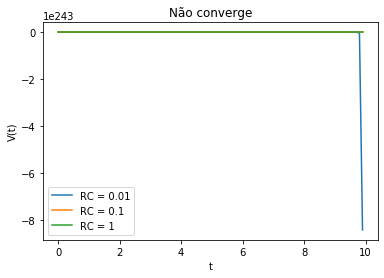

In [43]:
import numpy as np 
import matplotlib.pyplot as plt
import math
    
RC = [0.01,0.1,1]
V_out_0 = 0.0

def V_in(t):
    if math.floor(2*t)%2 == 0:
        return 1.0
    else:
        return -1.0

def g(V_fora, t ,RC):
    return 1/RC * (V_in(t) - V_fora)

a = 0.0
b = 10.0

N = 1000.0
h = (b-a)/N 
pontosT = np.arange(a,b,h)

def V_out(f,pontosT,RC,h): #Runge-Kuta 4ª ordem
    pontosV = []
    V = V_out_0
    for t in pontosT:
        pontosV.append(V)
        k1 = h*f(   V    ,   t   , RC)
        k2 = h*f(V+0.5*k1,t+0.5*h, RC)
        k3 = h*f(V+0.5*k2,t+0.5*h, RC)
        k4 = h*f( V + k3 , t + h , RC)
        V += (k1 + 2*k2 + 2*k3 + k4) / 6  
    return  pontosV

for valor in RC:
    plt.plot(pontosT , V_out(g,pontosT,valor,h), label = "RC = {}".format(valor))
      
plt.xlabel("t")
plt.ylabel("(Vt)")
plt.title("Converge")
plt.legend()
plt.show()

################### segundo gráfico #########################

N2 = 100.0  #não converge por não ter pontos suficientes 
h2 = (b-a)/N2 
pontosT2 = np.arange(a,b,h2)

for valor in RC:
    plt.plot(pontosT2 , V_out(g,pontosT2,valor,h2), label = "RC = {}".format(valor))
      
plt.xlabel("t")
plt.ylabel("V(t)")
plt.title("Não converge")
plt.legend()
plt.show()

# The cutoff frequency is given by 1 / (2*pi*RC)